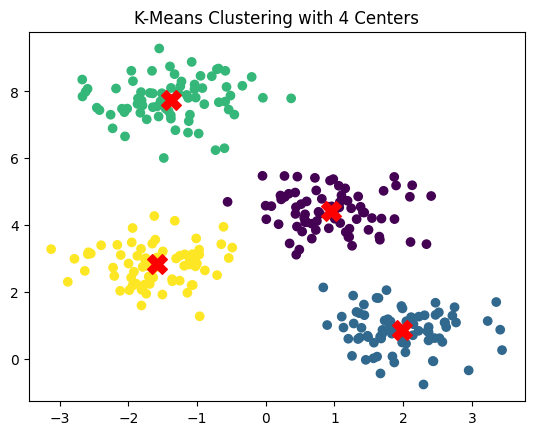

In [1]:
#q21
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering with 4 Centers")
plt.show()


In [2]:
#q22
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)

print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


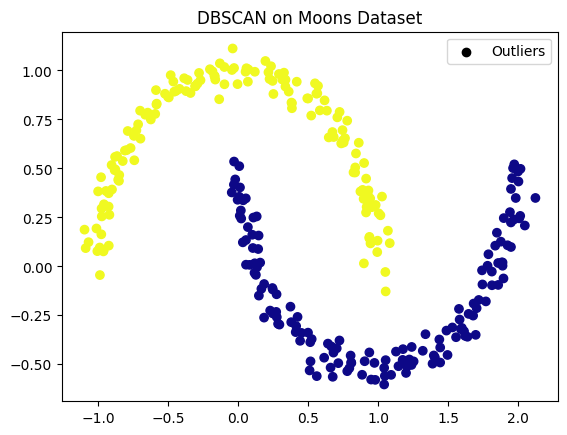

In [3]:
#q23
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1], c='black', label='Outliers')
plt.title("DBSCAN on Moons Dataset")
plt.legend()
plt.show()


In [4]:
#q24
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

import numpy as np
print("Cluster sizes:", np.bincount(kmeans.labels_))


Cluster sizes: [65 51 62]


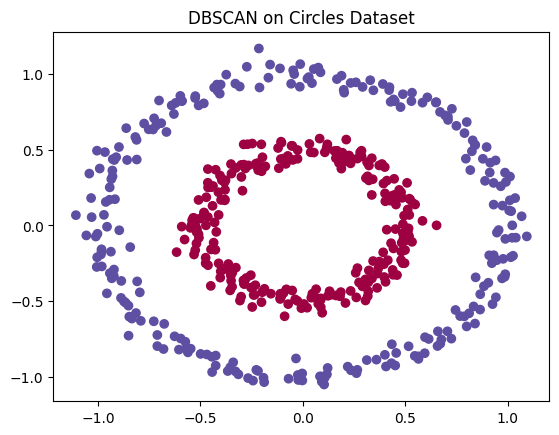

In [5]:
#q25
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral')
plt.title("DBSCAN on Circles Dataset")
plt.show()


In [6]:
#q26
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

print("Cluster Centroids:\n", kmeans.cluster_centers_)


Cluster Centroids:
 [[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


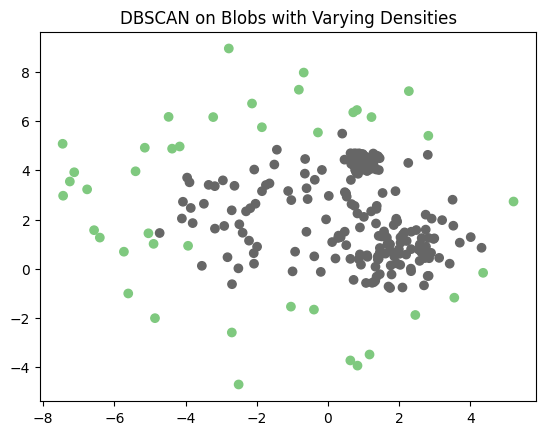

In [7]:
#q27
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[0.2, 1.0, 2.5], random_state=0)
db = DBSCAN(eps=0.9, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("DBSCAN on Blobs with Varying Densities")
plt.show()


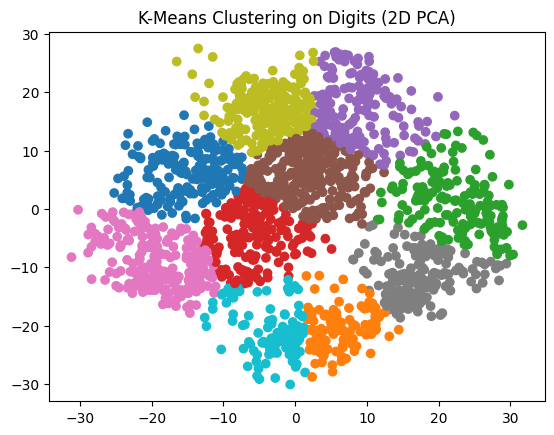

In [8]:
#q28
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("K-Means Clustering on Digits (2D PCA)")
plt.show()


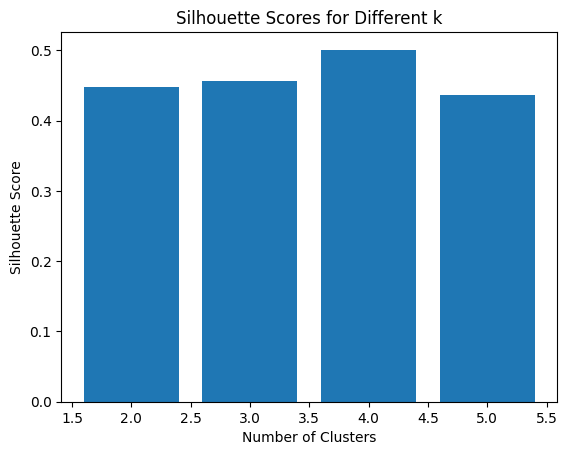

In [9]:
#q29
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=4, random_state=0)
scores = []
for k in range(2, 6):
    labels = KMeans(n_clusters=k, random_state=0).fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

plt.bar(range(2, 6), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.show()


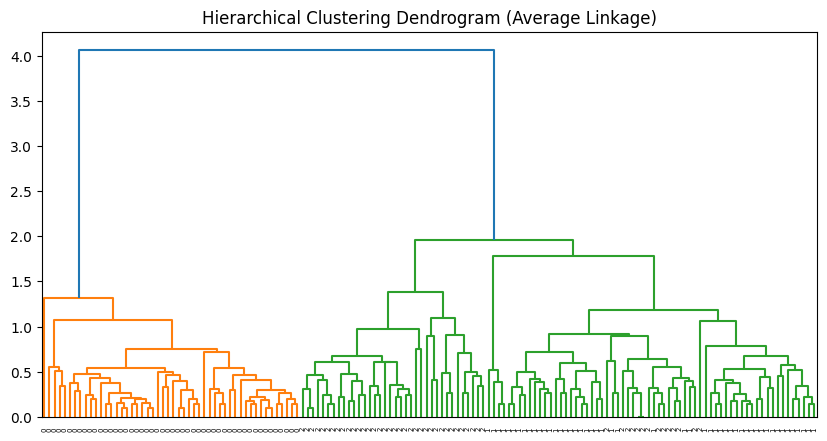

In [10]:
#q30
from scipy.cluster.hierarchy import dendrogram, linkage

X = load_iris().data
linked = linkage(X, method='average')

plt.figure(figsize=(10, 5))
dendrogram(linked, labels=load_iris().target, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.show()


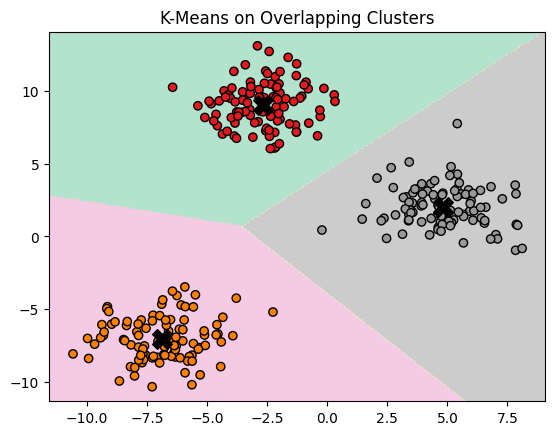

In [11]:
#q31
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Create decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='Set1', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='black')
plt.title("K-Means on Overlapping Clusters")
plt.show()


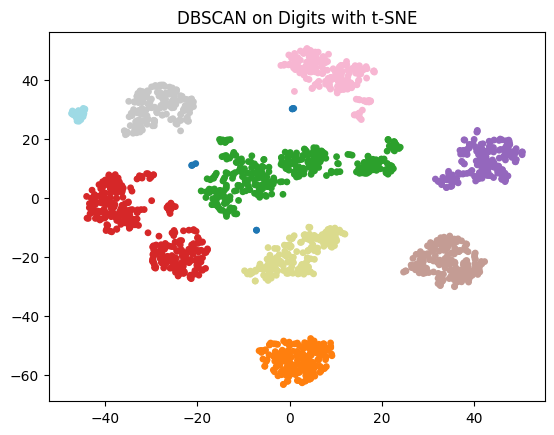

In [12]:
#q32
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

digits = load_digits()
X = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
labels = DBSCAN(eps=5, min_samples=5).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=15)
plt.title("DBSCAN on Digits with t-SNE")
plt.show()


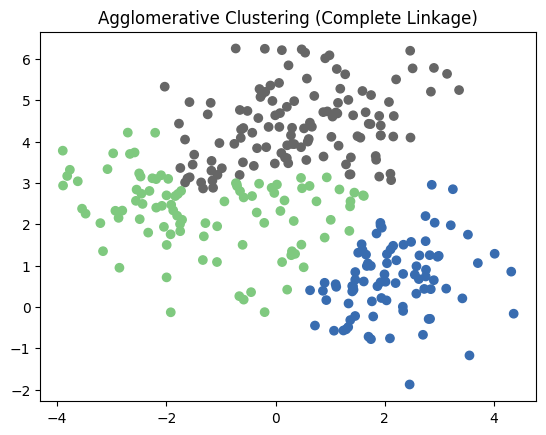

In [13]:
#q33
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=3, random_state=0)
model = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


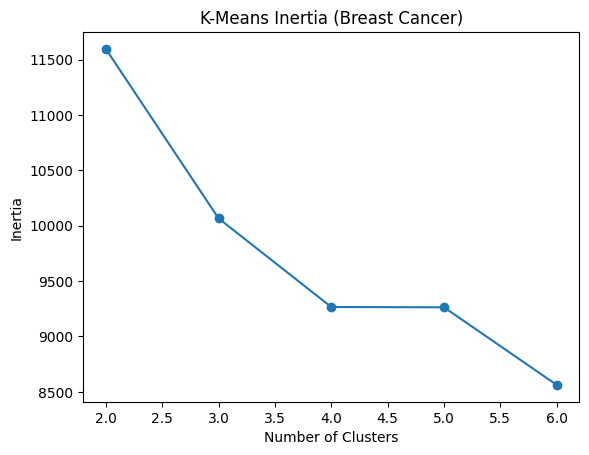

In [14]:
#q34
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(load_breast_cancer().data)

inertias = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.title("K-Means Inertia (Breast Cancer)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


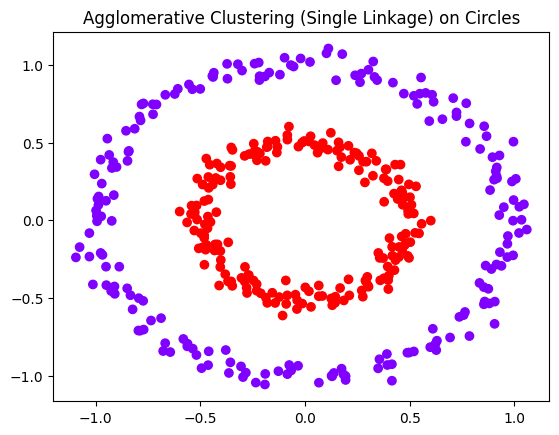

In [15]:
#q35
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=0)
model = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()


In [16]:
#q36
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(load_wine().data)
labels = DBSCAN(eps=1.2, min_samples=5).fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


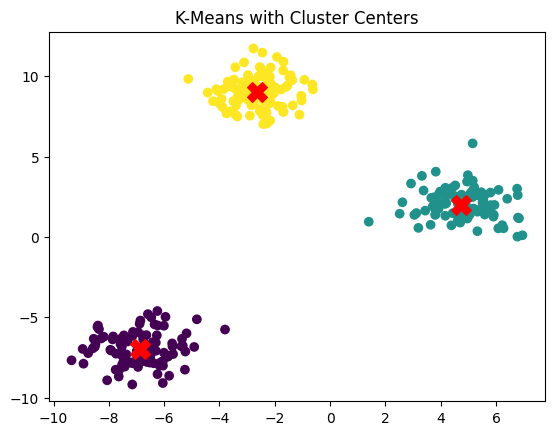

In [17]:
#q37
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means with Cluster Centers")
plt.show()


In [18]:
#q38
from sklearn.datasets import load_iris

X = load_iris().data
labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)
n_noise = list(labels).count(-1)

print("Number of noise samples:", n_noise)


Number of noise samples: 17


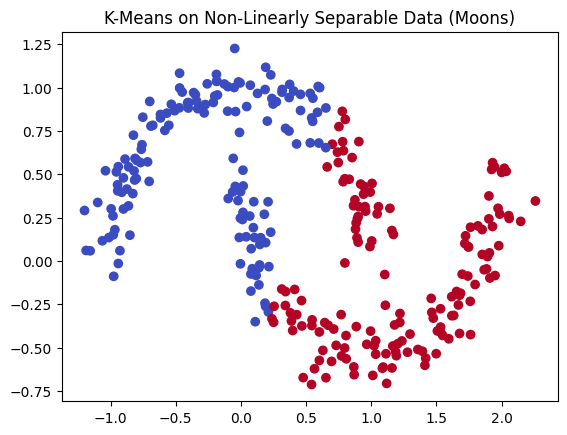

In [19]:
#q39
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.1, random_state=0)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm')
plt.title("K-Means on Non-Linearly Separable Data (Moons)")
plt.show()


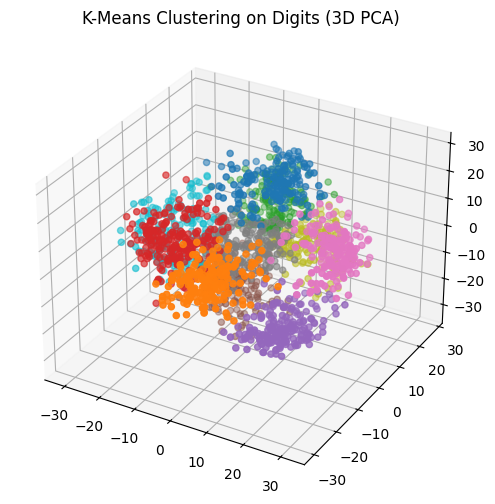

In [20]:
#q40
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X = PCA(n_components=3).fit_transform(load_digits().data)
labels = KMeans(n_clusters=10, random_state=42).fit_predict(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='tab10', s=20)
ax.set_title("K-Means Clustering on Digits (3D PCA)")
plt.show()
